In [9]:
train_df = pd.read_csv('Auto_Insurance_Fraud_Claims_File01.csv')
df.columns

Index(['Bind_Date1', 'Customer_Life_Value1', 'Age_Insured', 'Policy_State',
       'Policy_Start_Date', 'Policy_Expiry_Date', 'Policy_BI', 'Policy_Ded',
       'Policy_Premium', 'Umbrella_Limit', 'Insured_Zip', 'Gender',
       'Education', 'Occupation', 'Hobbies', 'Insured_Relationship',
       'Capital_Gains', 'Capital_Loss', 'Garage_Location', 'Accident_Date',
       'Accident_Type', 'Collision_Type', 'Accident_Severity',
       'authorities_contacted', 'Acccident_State', 'Acccident_City',
       'Accident_Location', 'Accident_Hour', 'Num_of_Vehicles_Involved',
       'Property_Damage', 'Bodily_Injuries', 'Witnesses', 'Police_Report',
       'DL_Expiry_Date', 'Claims_Date', 'Auto_Make', 'Auto_Model', 'Auto_Year',
       'Vehicle_Color', 'Vehicle_Cost', 'Annual_Mileage', 'DiffIN_Mileage',
       'Low_Mileage_Discount', 'Commute_Discount', 'Total_Claim',
       'Injury_Claim', 'Property_Claim', 'Vehicle_Claim', 'Check_Point'],
      dtype='object')

In [10]:
valid_df = pd.read_csv('Auto_Insurance_Fraud_Claims_File02.csv')
df.columns

Index(['Bind_Date1', 'Customer_Life_Value1', 'Age_Insured', 'Policy_State',
       'Policy_Start_Date', 'Policy_Expiry_Date', 'Policy_BI', 'Policy_Ded',
       'Policy_Premium', 'Umbrella_Limit', 'Insured_Zip', 'Gender',
       'Education', 'Occupation', 'Hobbies', 'Insured_Relationship',
       'Capital_Gains', 'Capital_Loss', 'Garage_Location', 'Accident_Date',
       'Accident_Type', 'Collision_Type', 'Accident_Severity',
       'authorities_contacted', 'Acccident_State', 'Acccident_City',
       'Accident_Location', 'Accident_Hour', 'Num_of_Vehicles_Involved',
       'Property_Damage', 'Bodily_Injuries', 'Witnesses', 'Police_Report',
       'DL_Expiry_Date', 'Claims_Date', 'Auto_Make', 'Auto_Model', 'Auto_Year',
       'Vehicle_Color', 'Vehicle_Cost', 'Annual_Mileage', 'DiffIN_Mileage',
       'Low_Mileage_Discount', 'Commute_Discount', 'Total_Claim',
       'Injury_Claim', 'Property_Claim', 'Vehicle_Claim', 'Check_Point'],
      dtype='object')

In [8]:
test_df = pd.read_csv('Auto_Insurance_Fraud_Claims_File03.csv')
df.columns

Index(['Bind_Date1', 'Customer_Life_Value1', 'Age_Insured', 'Policy_State',
       'Policy_Start_Date', 'Policy_Expiry_Date', 'Policy_BI', 'Policy_Ded',
       'Policy_Premium', 'Umbrella_Limit', 'Insured_Zip', 'Gender',
       'Education', 'Occupation', 'Hobbies', 'Insured_Relationship',
       'Capital_Gains', 'Capital_Loss', 'Garage_Location', 'Accident_Date',
       'Accident_Type', 'Collision_Type', 'Accident_Severity',
       'authorities_contacted', 'Acccident_State', 'Acccident_City',
       'Accident_Location', 'Accident_Hour', 'Num_of_Vehicles_Involved',
       'Property_Damage', 'Bodily_Injuries', 'Witnesses', 'Police_Report',
       'DL_Expiry_Date', 'Claims_Date', 'Auto_Make', 'Auto_Model', 'Auto_Year',
       'Vehicle_Color', 'Vehicle_Cost', 'Annual_Mileage', 'DiffIN_Mileage',
       'Low_Mileage_Discount', 'Commute_Discount', 'Total_Claim',
       'Injury_Claim', 'Property_Claim', 'Vehicle_Claim', 'Check_Point'],
      dtype='object')

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Load your training CSV
train_df = pd.read_csv("Auto_Insurance_Fraud_Claims_File01.csv")  # replace with actual training file name

# Drop columns that don't help with prediction
drop_cols = ['Claim_ID', 'Policy_Num', 'Vehicle_Registration',
             'Bind_Date1', 'Policy_Start_Date', 'Policy_Expiry_Date',
             'Accident_Date', 'DL_Expiry_Date', 'Claims_Date']
train_df.drop(columns=drop_cols, inplace=True)

# Target variable
y = train_df['Fraud_Ind'].map({'Y': 1, 'N': 0})  # convert to 0 and 1
X = train_df.drop(columns=['Fraud_Ind'])

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Handle missing values (impute)
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='mean')

X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])
X[num_cols] = num_imputer.fit_transform(X[num_cols])

# Encode categorical columns using Label Encoding
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

# Normalize numeric columns (optional, but good practice)
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_val)
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5996
           1       1.00      1.00      1.00      2004

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Confusion Matrix:
 [[5996    0]
 [   0 2004]]


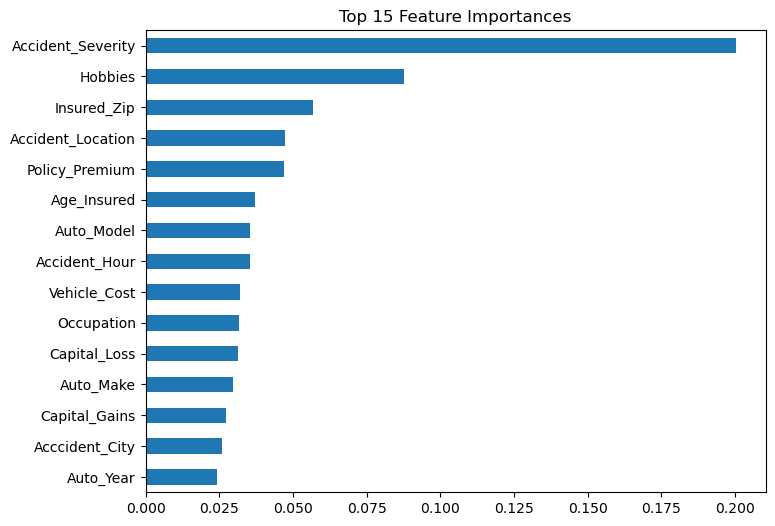

In [2]:
import matplotlib.pyplot as plt

importances = clf.feature_importances_
feature_names = X.columns

# Sort and plot
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp.head(15).plot(kind='barh', figsize=(8,6))
plt.title("Top 15 Feature Importances")
plt.gca().invert_yaxis()
plt.show()


In [3]:
# Check value distribution of top features grouped by fraud label
print(train_df.groupby('Fraud_Ind')['Accident_Severity'].value_counts(normalize=True))
print(train_df.groupby('Fraud_Ind')['Hobbies'].value_counts(normalize=True).head(10))


Fraud_Ind  Accident_Severity
N          Minor Damage         0.421248
           Total Loss           0.324369
           Major Damage         0.144655
           Trivial Damage       0.109728
Y          Major Damage         0.677632
           Minor Damage         0.155263
           Total Loss           0.143421
           Trivial Damage       0.023684
Name: proportion, dtype: float64
Fraud_Ind  Hobbies       
N          camping           0.066600
           kayaking          0.066169
           reading           0.063147
           movies            0.062948
           golf              0.062683
           bungie-jumping    0.062550
           exercise          0.060923
           paintball         0.058765
           video-games       0.054316
           skydiving         0.052556
Name: proportion, dtype: float64


In [4]:
suspicious_cols = ['Accident_Severity', 'Hobbies', 'Insured_Zip', 'Accident_Location']
X_filtered = X.drop(columns=suspicious_cols)

# Then retrain the model using X_filtered instead of X


In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix

# Load training and validation datasets
train_df = pd.read_csv("Auto_Insurance_Fraud_Claims_File01.csv")
val_df = pd.read_csv("Auto_Insurance_Fraud_Claims_File02.csv")

def preprocess(df):
    # Drop ID/date columns that won't help
    drop_cols = ['Claim_ID', 'Policy_Num', 'Vehicle_Registration',
                 'Bind_Date1', 'Policy_Start_Date', 'Policy_Expiry_Date',
                 'Accident_Date', 'DL_Expiry_Date', 'Claims_Date']
    df = df.drop(columns=drop_cols)

    # Separate labels
    y = df['Fraud_Ind'].map({'Y': 1, 'N': 0})
    X = df.drop(columns=['Fraud_Ind'])

    # Identify column types
    cat_cols = X.select_dtypes(include='object').columns
    num_cols = X.select_dtypes(include=['int64', 'float64']).columns

    # Handle missing values
    X[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(X[cat_cols])
    X[num_cols] = SimpleImputer(strategy='mean').fit_transform(X[num_cols])

    # Encode categoricals
    for col in cat_cols:
        X[col] = LabelEncoder().fit_transform(X[col])

    # Normalize numericals
    X[num_cols] = StandardScaler().fit_transform(X[num_cols])
    
    return X, y

# Preprocess both
X_train, y_train = preprocess(train_df)
X_val, y_val = preprocess(val_df)

# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on validation set
y_pred = clf.predict(X_val)

# Evaluate
print("✅ Classification Report:\n", classification_report(y_val, y_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

import joblib
joblib.dump(clf, "model.pkl")
print("✅ Model saved as 'model.pkl'")



✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14680
           1       1.00      0.99      1.00      5320

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

✅ Confusion Matrix:
 [[14680     0]
 [   37  5283]]
✅ Model saved as 'model.pkl'


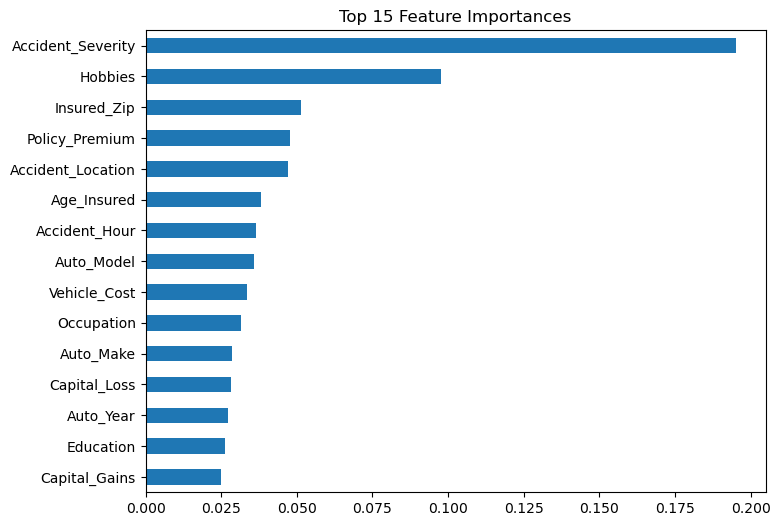

In [11]:
import matplotlib.pyplot as plt

importances = clf.feature_importances_
feature_names = X.columns

# Sort and plot
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp.head(15).plot(kind='barh', figsize=(8,6))
plt.title("Top 15 Feature Importances")
plt.gca().invert_yaxis()
plt.show()


In [13]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Load trained model
model = joblib.load("model.pkl")

# Load test data
test_df = pd.read_csv("Auto_Insurance_Fraud_Claims_File03.csv")

# 🧼 Define the same preprocessing steps (EXACTLY like training)
drop_cols = ['Claim_ID', 'Policy_Num', 'Vehicle_Registration',
             'Bind_Date1', 'Policy_Start_Date', 'Policy_Expiry_Date',
             'Accident_Date', 'DL_Expiry_Date', 'Claims_Date']

X = test_df.drop(columns=drop_cols, errors='ignore')

# Identify types
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Impute missing values
X[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(X[cat_cols])
X[num_cols] = SimpleImputer(strategy='mean').fit_transform(X[num_cols])

# Encode categoricals
for col in cat_cols:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Normalize numericals
X[num_cols] = StandardScaler().fit_transform(X[num_cols])

# Predict
y_pred = model.predict(X)

# Add predictions to original dataframe
test_df['Fraud_Predicted'] = y_pred

# Save to CSV
test_df[['Claim_ID', 'Fraud_Predicted']].to_csv("fraud_predictions.csv", index=False)
print("✅ Predictions saved to 'fraud_predictions.csv'")


✅ Predictions saved to 'fraud_predictions.csv'


In [14]:
pd.read_csv("fraud_predictions.csv").head()


,Claim_ID,Fraud_Predicted
0,CC00000001,0
1,CC00000002,0
2,CC00000003,1
3,CC00000004,0
4,CC00000005,0


In [15]:
# Count how many frauds were predicted
df_pred = pd.read_csv("fraud_predictions.csv")
fraud_counts = df_pred['Fraud_Predicted'].value_counts()

print("Fraud prediction counts:")
print(fraud_counts)


Fraud prediction counts:
Fraud_Predicted
0    7320
1    2680
Name: count, dtype: int64


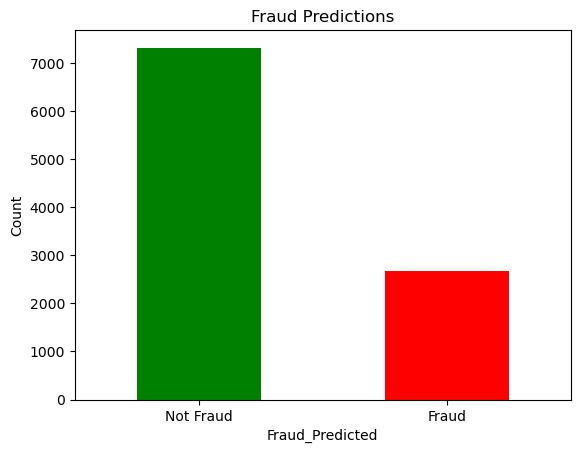

In [16]:
import matplotlib.pyplot as plt

fraud_counts.plot(kind='bar', color=['green', 'red'])
plt.title("Fraud Predictions")
plt.xticks(ticks=[0, 1], labels=["Not Fraud", "Fraud"], rotation=0)
plt.ylabel("Count")
plt.show()


In [17]:
test_df.to_csv("full_fraud_predictions_with_details.csv", index=False)
